In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from sklearn.preprocessing import RobustScaler
import csv
import datetime
from sklearn.svm import SVR
import sklearn.svm as svm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import utils

In [2]:
data = pd.read_csv("Weather Data.csv")
temp = pd
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [3]:
data #affiche dataset

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [4]:
#data.rename(columns= {'Dew Point Temp_C':'Degre Humidité'})
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555396,67.431808,14.945469,27.664447,101.051623
std,11.687883,10.883101,16.918619,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [5]:
__columnNames= []
for col in data.columns:
    __columnNames.append(data[col].name)
__columnNames

['Date/Time',
 'Temp_C',
 'Dew Point Temp_C',
 'Rel Hum_%',
 'Wind Speed_km/h',
 'Visibility_km',
 'Press_kPa',
 'Weather']

In [6]:
data.head() #affiche les premier lignes (5 par defaut)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [7]:
data.shape #nb ligne et nb column

(8784, 8)

In [8]:
data.index #affiche les index de dataset

RangeIndex(start=0, stop=8784, step=1)

In [9]:
data.columns #les nom des columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [10]:
data.dtypes #les types de chaque data

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [11]:
data['Weather'].unique() #pour chaque column,affiche les valeurs uniques qui peut avoir sas double


array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [12]:
data.nunique() #les valeurs unique qui a chaque column 

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [13]:
len(data['Weather'].unique())

50

In [14]:
data['Weather'].count() #les nb de valeurs non null de chaque column

8784

In [15]:
data[data.Weather == 'Rain']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
18,1/1/2012 18:00,3.8,1.0,82,15,12.9,99.74,Rain
19,1/1/2012 19:00,3.1,1.3,88,15,12.9,99.68,Rain
542,1/23/2012 14:00,2.7,-1.1,76,26,48.3,101.01,Rain
543,1/23/2012 15:00,2.7,-0.9,77,30,24.1,100.86,Rain
545,1/23/2012 17:00,3.1,-0.4,78,28,16.1,100.61,Rain
...,...,...,...,...,...,...,...,...
8537,12/21/2012 17:00,1.3,0.2,92,46,12.9,97.76,Rain
8538,12/21/2012 18:00,1.4,0.3,92,46,25.0,97.56,Rain
8539,12/21/2012 19:00,2.3,1.1,92,37,11.3,97.52,Rain
8540,12/21/2012 20:00,2.4,1.7,95,15,9.7,97.58,Rain


In [16]:
data[data['Weather'].str.contains('Rain')]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
18,1/1/2012 18:00,3.8,1.0,82,15,12.9,99.74,Rain
19,1/1/2012 19:00,3.1,1.3,88,15,12.9,99.68,Rain
22,1/1/2012 22:00,4.4,1.9,84,24,19.3,99.32,Rain Showers
24,1/2/2012 0:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
153,1/7/2012 9:00,-6.1,-8.7,82,7,9.7,100.15,"Freezing Rain,Fog"
...,...,...,...,...,...,...,...,...
8537,12/21/2012 17:00,1.3,0.2,92,46,12.9,97.76,Rain
8538,12/21/2012 18:00,1.4,0.3,92,46,25.0,97.56,Rain
8539,12/21/2012 19:00,2.3,1.1,92,37,11.3,97.52,Rain
8540,12/21/2012 20:00,2.4,1.7,95,15,9.7,97.58,Rain


In [17]:
data.groupby('Weather').max()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather,,,,,,,
Clear,9/9/2012 5:00,32.8,20.4,99,33,48.3,103.63
Cloudy,9/9/2012 23:00,30.5,22.6,99,54,48.3,103.65
Drizzle,9/30/2012 3:00,18.8,17.7,96,30,25.0,101.56
"Drizzle,Fog",9/30/2012 2:00,19.9,19.1,100,28,9.7,102.07
"Drizzle,Ice Pellets,Fog",12/17/2012 9:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",12/19/2012 18:00,1.2,0.2,95,19,11.3,101.15
"Drizzle,Snow,Fog",12/22/2012 3:00,1.1,0.6,98,32,9.7,100.15
Fog,9/22/2012 0:00,20.8,19.6,100,22,9.7,103.04
Freezing Drizzle,2/1/2012 5:00,-2.3,-3.3,93,26,12.9,101.02


In [18]:
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [19]:
data.count()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

In [20]:
data['Weather'].value_counts() #le nombre de chaque valeur dans le dataset d attribut Weather

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Haze                                         16
Thunderstorms,Rain Showers                   16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [22]:
data.groupby(['Weather']).mean()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.376331,69.593171,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


In [24]:
data = pd.read_csv("Weather Data.csv",index_col='Date/Time',parse_dates=True)

In [25]:
New=data['Temp_C'].resample('m').agg(['mean','std','min','max'])
New.head(12)

,mean,std,min,max
Date/Time,,,,
2012-01-31,-7.371505,6.382532,-23.3,5.3
2012-02-29,-4.225000,5.132305,-16.9,6.1
2012-03-31,3.121237,7.808771,-16.2,25.5
2012-04-30,7.009306,5.031103,-3.0,27.8
2012-05-31,16.237769,5.216031,4.6,31.2
2012-06-30,20.134028,5.011927,9.5,33.0
2012-07-31,22.790054,4.026849,12.4,33.0
2012-08-31,22.279301,3.708003,10.5,32.8
2012-09-30,16.484444,5.285297,4.9,28.4


Text(0, 0.5, 'Nb Observation')

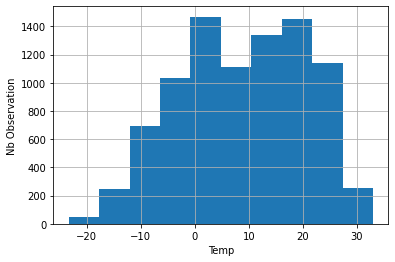

In [26]:
data['Temp_C'].hist()
plt.xlabel("Temp")
plt.ylabel("Nb Observation")

<AxesSubplot:xlabel='Rel Hum_%', ylabel='Temp_C'>

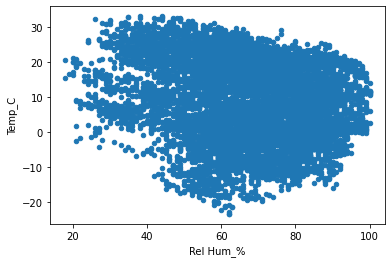

In [27]:
data.plot.scatter(x='Rel Hum_%',y='Temp_C')

<AxesSubplot:xlabel='Date/Time'>

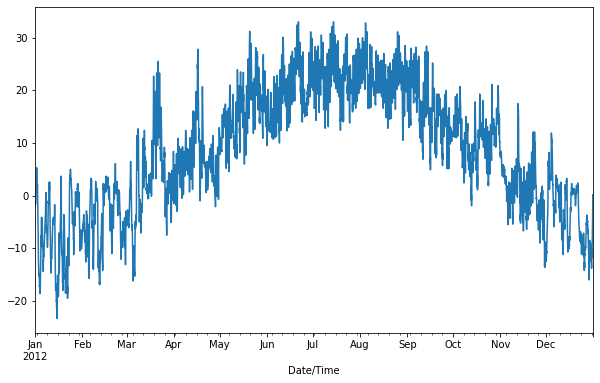

In [28]:
data['Temp_C'].plot(figsize=(10,6))

Date/Time
2012-01-31    AxesSubplot(0.125,0.125;0.775x0.755)
2012-02-29    AxesSubplot(0.125,0.125;0.775x0.755)
2012-03-31    AxesSubplot(0.125,0.125;0.775x0.755)
2012-04-30    AxesSubplot(0.125,0.125;0.775x0.755)
2012-05-31    AxesSubplot(0.125,0.125;0.775x0.755)
2012-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
2012-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2012-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2012-09-30    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: M, Name: Temp_C, dtype: object

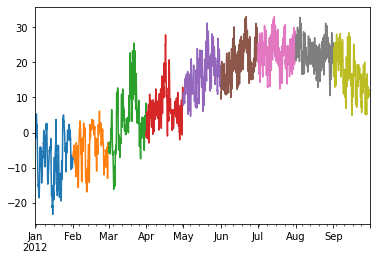

In [29]:
data.loc['2012-01':'2012-09','Temp_C'].resample('m').plot()

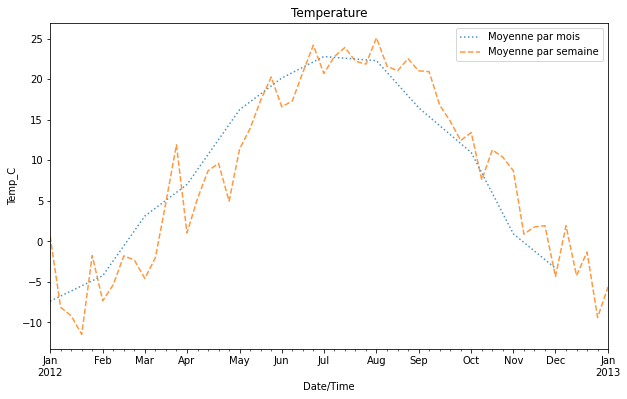

In [30]:
#utiliser matplotlib pour construire des figures plus complète
#choisir la taille des figures
plt.figure(figsize=(10,6))
#insérer plusieurs courbes dans la meme figure
#data.loc['2012-01':'2012-12','Temp_C'].plot()
data.loc['2012-01':'2012-12','Temp_C'].resample('m').mean().plot(label='Moyenne par mois',ls=':',alpha=0.8)
data.loc['2012-01':'2012-12','Temp_C'].resample('w').mean().plot(label='Moyenne par semaine',ls='--',alpha=0.8)
#donner un nom àa la figure
plt.title('Temperature')
#axes
#plt.xlabel('Date')
plt.ylabel('Temp_C')
#ajouter une légente
plt.legend()
#enregistrer la figure sur disque
plt.savefig("fig1.jpg")
plt.show()